# Graduação em Matemática Aplicada e Ciência de Dados  
**Álgebra Linear Numérica**  
Bernardo Freitas Paulo da Costa  
Monitora: Beatriz Lúcia Teixeira de Souza  

## Projeto 4  
### Álgebra Linear e Matrizes Aleatórias  
**para 21 de Junho de 2025**  

---


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
np.random.seed(42)
%matplotlib inline

In [5]:
# Gerando matriz aleatória m x n

def matrix(m, n):
    """
    Gera uma matriz aleatória de tamanho m x n.
    """
    return np.random.normal(size=(m, n), loc=0, scale=1)


### Questão 1. Matrizes Gaussianas  
Uma matriz gaussiana tem todas as entradas \( A_{ij} \) independentes e distribuídas segundo uma normal padrão, ou seja, \( A_{ij} \sim \mathcal{N}(0,1) \).  

**a) Distribuição das normas.**  
Faça um histograma da norma-2 das colunas de uma matriz gaussiana \( A_{m \times n} \). Use vários valores de \( m \), e comente o que você observa.  



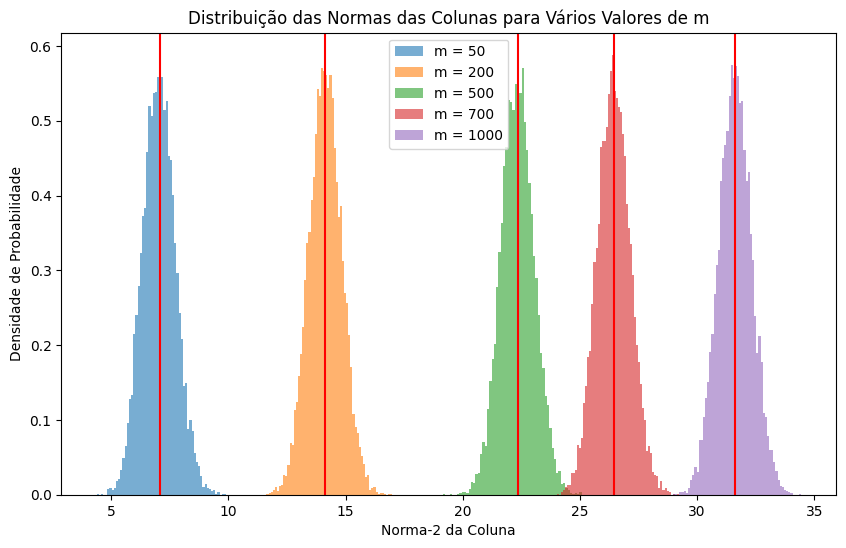

In [6]:
# Dimensões das matrizes
m_values = [ 50, 200, 500, 700, 1000]
n = 10000

# Plotando gráfico inicial
plt.figure(figsize=(10,6))

# Iterando para cada valor possível de m
for m in m_values:

   # Gerando a matriz e criando a sua lista da norma das colunas
   A = matrix(m, n)
   A_norms = []

   # Salvando a norma de cada coluna
   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))

   # Plotando o histograma das normas, e uma linha vertical da média
   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

# Detalhes a mais do plot
plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

Por uma ***grande*** coincidência, matrizes aleatórias gaussianas possuem vetores cuja norma também representa uma distribuissão aproximadamente gaussiana.

Claro, na matemática não temos coincidências, e nesse caso a explicação é bem simples!
Cada elemento $A_{ij}$ de uma matriz $A_{m \times n}$ é uma variável aleatória $A_{ij} \sim \mathcal{N}(0,1)$, logo, $\mu(A_{ij}^2) = 1$.

Ora, a norma quadrada de um vetor $A_j$ nada mais é do que $||A_j||^2_2 = \sum^i A_{ij}^2$, ou seja, $\mu (||A_j||^2_2) = \sum^i 1 = m \therefore \mu (||A_j||_2) = \sqrt m$. 

As linhas vermelhas no gráfico indicam as médias $\sqrt m$ para cada quantidade de linhas testada. 

Podemos observar as distribuições melhor no gráfico abaixo:

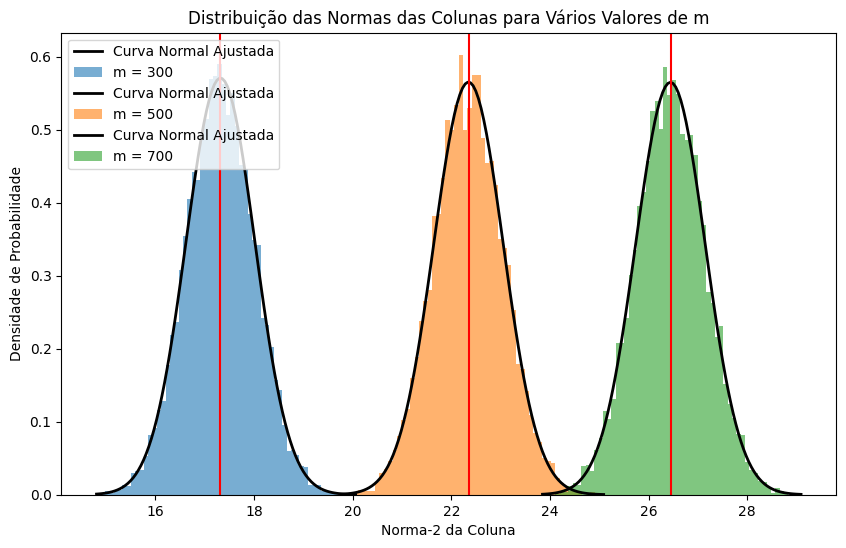

In [7]:
# Mesmo código anterior adicionando a curva normal


m_values = [300, 500, 700]
n = 10000

plt.figure(figsize=(10,6))

for m in m_values:
   A = matrix(m, n)
   A_norms = []

   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))
   
   # Aqui eu ploto uma curva normal fittada na lista de normas
   med, desv_pad = norm.fit(A_norms)
   x = np.linspace(min(A_norms), max(A_norms), 100) # Eixo de plotagem da curva
   p = norm.pdf(x, med, desv_pad)
   plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Ajustada')


   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

**b) Produtos internos.**  
Fixe $m = 100$ e faça o histograma do produto interno $\langle A_i, A_j \rangle$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100$, 200, 500 e 1000. O que acontece? Qual parece ser a distribuição para $n \to \infty$?  


desvio padrão = 9.779956549765707, erro = 0.22004345023429295
media = 0.021240516817008497, erro = 0.021240516817008497


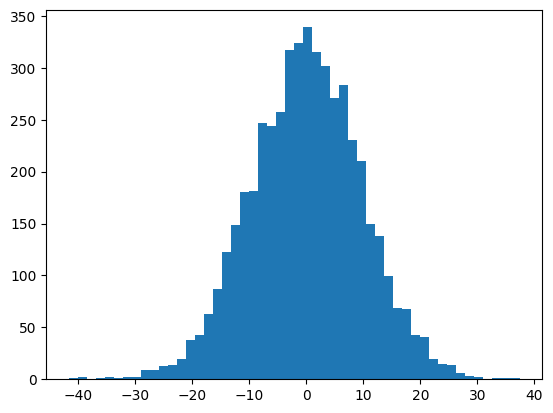

desvio padrão = 10.014999527546745, erro = 0.014999527546745384
media = 0.05643016341885421, erro = 0.05643016341885421


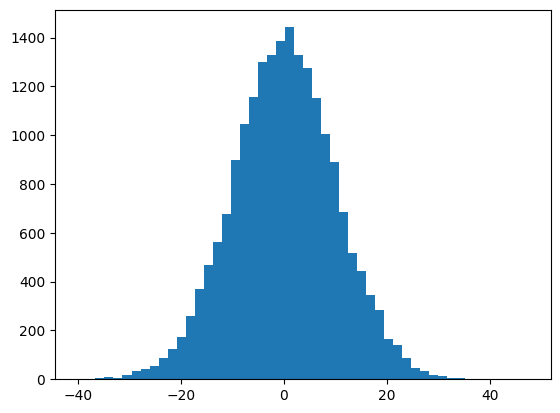

desvio padrão = 10.080276366836708, erro = 0.08027636683670814
media = -0.01096813786611043, erro = 0.01096813786611043


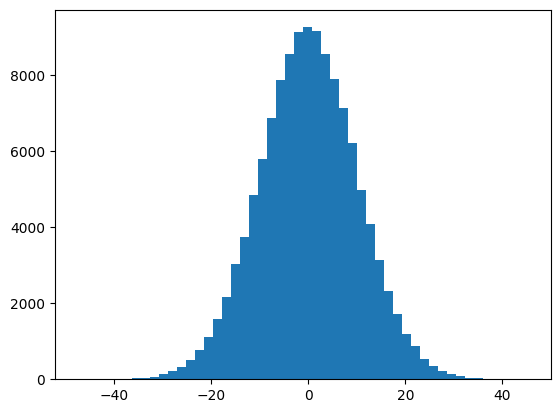

desvio padrão = 10.037114556552325, erro = 0.037114556552324984
media = 0.022160433428398518, erro = 0.022160433428398518


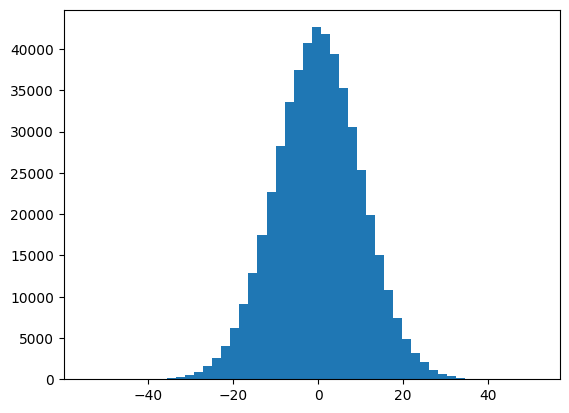

In [8]:
m = 100
ns = [100, 200, 500, 1000]

for n in ns:
    
    mx = matrix(m, n)
    #pega dos os produtos com o numpy, descarta os que não quer depois
    prod = mx.T @ mx
    indices = np.triu_indices(n, k=1)
    off_diagonal_products = prod[indices]
    
    plt.hist(off_diagonal_products, bins=50)
    #mostra a variancia e media
    print(f"desvio padrão = {np.std(off_diagonal_products)}, erro = {np.abs(np.std(off_diagonal_products) - 10)}")
    print(f"media = {np.mean(off_diagonal_products)}, erro = {np.abs(np.mean(off_diagonal_products))}")
    plt.show()           

de novo, apresenta um comportamento normal, que se evidencia mais com o crescimento de M. Além de deixar a curva ainda mais facil de se observar, a curva se estreita, e menos dados são observados nas caudas. Como discutido anteriormente, $\mu \approx \sqrt{n}$, $\sigma \approx 0$ o codigo acima indica valores ligeiramente diferentes do esperado. Se espera que com $x \to \inf$, A curva normal fica ainda mais evidente, e os parametros tendam ao téorico $\mu \to 10$, $\sigma \to 0$

9.951206526032466, erro = 0.04879347396753353
0.02034871097723222, erro = 0.02034871097723222


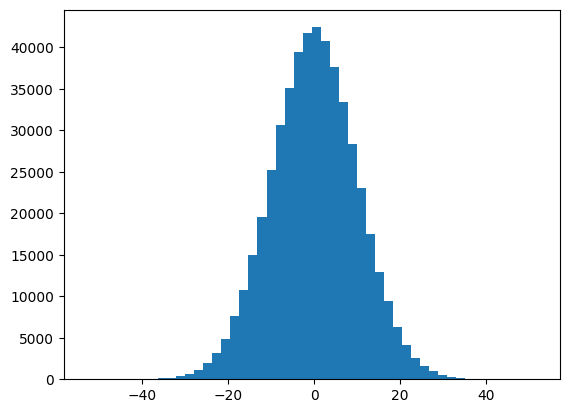

In [9]:
mx = matrix(m=100, n=30000) #maior que isso deu pau na maquina
prod = mx.T @ mx
indices = np.triu_indices(n, k=1)
off_diagonal_products = prod[indices]

plt.hist(off_diagonal_products, bins=50)
np.std(off_diagonal_products)
print(f"{np.std(off_diagonal_products)}, erro = {np.abs(np.std(off_diagonal_products) - 10)}")
print(f"{np.mean(off_diagonal_products)}, erro = {np.abs(np.mean(off_diagonal_products))}")
plt.show()

Com $m$ na escala de $10^5$, o erro comparado com o esperado $N(0,10^2)$ diminui ainda mais, se espera que com valores ainda menores o erro $\to 0$

**c) A distribuição do máximo.**  
Queremos ver quão "não ortogonal" é a matriz $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo de $\frac{|\langle A_i, A_j \rangle|}{||A_i|| \cdot ||A_j||}$ entre colunas distintas, e faça um histograma dos $K$ valores obtidos. 

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_7724\1807120667.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


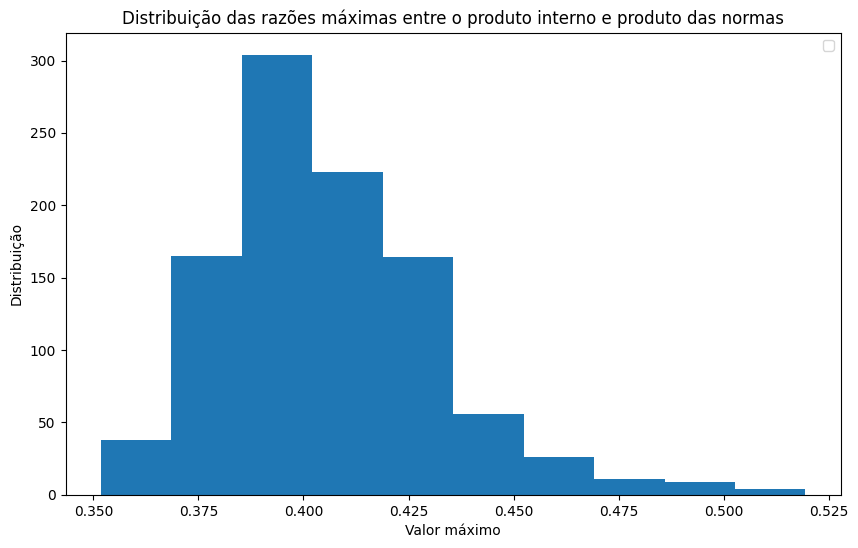

In [10]:
max_k = []

def value(vec1, vec2):
   return (np.inner(vec1, vec2))/(np.linalg.norm(vec1) * np.linalg.norm(vec2))

for _ in range(1000):
   A = matrix(100, 300)
   max_val = 0
   for i in range(A.shape[1]):
      for j in range(i+1, A.shape[1]):
         current_val = value(A[:,i], A[:,j])
         if current_val > max_val:
            max_val = current_val

   max_k.append(max_val)

plt.figure(figsize=(10,6))
plt.hist(max_k)
plt.title('Distribuição das razões máximas entre o produto interno e produto das normas')
plt.xlabel("Valor máximo")
plt.ylabel("Distribuição")
plt.legend()
plt.show()


**d) Complexidade computacional.**  
Qual a complexidade de calcular o máximo acima? Qual valor de $K$ seria bom para ter uma boa estimativa do máximo esperado?  

### Exercício ***1.d)***

Vamos observar a complexidade desse algoritmo, iniciando pela função `value`:

* Primeiro calculamos o produto interno dos dois vetores, isso corresponde a $m$ produtos e $m-1$ somas, logo, uma complexidade $O(m)$
* Depois calculamos o produto das normas dos vetores, isto é, $2 \cdot (2m - 1)$ operações, logo, $O(m)$.

Portanto a função `value` tem complexidade $O(m)$.

O nosso loop 

```py
for i in range(A.shape[1]):
      for j in range(i+1, A.shape[1]):
```

está otimizado para reduzir a quantidade de operações, já que o valor de $j$ passa a ser contado a partir de $i+1$. A quantidade de operações para cada coluna $i$ será de $n - i$, o que é a soma de P.A:

$$
\sum_{i=0} ^n (n - i) = \frac{n^2 - n}{2}
$$

O que nos dá uma complexidade de $O(n^2)$.

Ora, se para cada uma dessas iterações executamos `value` uma vez, temos uma complexidade agregada de $O(n^2m)$.

---

**e) A distribuição do máximo, parte 2.**  
Escolha valores de $K$ correspondentes e faça histogramas (comente os resultados) para os pares:  
- $(m,n) = (100, 100)$, $(100, 300)$  
- $(200, 200)$, $(200, 600)$  
- $(500, 500)$, $(500, 1500)$  
- $(1000, 1000)$, $(1000, 3000)$  

**Escolhendo Ks:**

In [ ]:
max_k = []
def get_max():
   def value(vec1, vec2):
      return (np.inner(vec1, vec2))/(np.linalg.norm(vec1) * np.linalg.norm(vec2))

   for _ in range(10):
      A = matrix(1000, 3000)
      max_val = 0
      for i in range(A.shape[1]):
         for j in range(i+1, A.shape[1]):
            current_val = value(A[:,i], A[:,j])
            if current_val > max_val:
               max_val = current_val
         return(max_val)
      max_k.append(max_val)

plt.figure(figsize=(10,6))
plt.hist(max_k)
plt.title('Distribuição das razões máximas entre o produto interno e produto das normas')
plt.xlabel("Valor máximo")
plt.ylabel("Distribuição")
plt.legend()
plt.show()


In [ ]:
import time

# The desired precision for our estimate of the mean.
THRESHOLD = 0.0005
# How many iterations to run before checking for convergence.
CHECK_INTERVAL = 1
# Safety break to prevent a potential infinite loop.
MAX_ITERATIONS = 20000
#tests with the biggest matrix
m, n = 1000, 3000


def get_max(A):
    """
    Finds the maximum absolute normalized inner product between distinct columns of matrix A.
    This corresponds to one sample for our experiment.
    """
    # Note the use of abs() as specified in the project description (Questão 1c)
    def value(vec1, vec2):
        return (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    max_val = 0
    num_cols = A.shape[1]
    # Correctly iterate through unique pairs (i, j) where i < j
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            current_val = value(A[:, i], A[:, j])
            if current_val > max_val:
                max_val = current_val
    return max_val

# --- Main Simulation Loop with Convergence Check ---
max_k = []
previous_mean = float('inf')
start_time = time.time()

print(f"Running simulation for m={m}, n={n}")
print(f"Stopping when change in mean < {THRESHOLD} (checked every {CHECK_INTERVAL} runs)\n")

for k in range(1, MAX_ITERATIONS + 1, CHECK_INTERVAL):
    A = matrix(m, n)
    max_val = get_max(A)
    max_k.append(max_val)

    if k % CHECK_INTERVAL == 0:
        current_mean = np.mean(max_k)
        change = abs(current_mean - previous_mean)

        print(f"K = {k:<5} | Current Mean = {current_mean:.6f} | Change = {change:.6f}")

        if change < THRESHOLD:
            print(f"\nConvergence reached at K = {k}.")
            break
        
        previous_mean = current_mean

# --- Final Results ---
end_time = time.time()
final_mean = np.mean(max_k)
final_std = np.std(max_k)
total_time = end_time - start_time

print(f"----------------------------------------------------")
print(f"Final K value: {len(max_k)}")
print(f"Estimated Expected Maximum: {final_mean:.6f}")
print(f"Standard Deviation of Maximums: {final_std:.6f}")
print(f"Total computation time: {total_time:.2f} seconds")
print(f"----------------------------------------------------")


# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.hist(max_k, bins=30, density=True, edgecolor='black', label='Histogram of Maximums')
# Plot a vertical line at the mean
plt.axvline(final_mean, color='r', linestyle='--', linewidth=2, label=f'Estimated Mean: {final_mean:.4f}')
plt.title(f'Distribution of Maximums for K={len(max_k)} Samples (m={m}, n={n})')
plt.xlabel("Maximum Normalized Inner Product")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

Running simulation for m=1000, n=3000
Stopping when change in mean < 0.0005 (checked every 1 runs)

K = 1     | Current Mean = 1161.061610 | Change = inf
K = 2     | Current Mean = 1164.792996 | Change = 3.731386
K = 3     | Current Mean = 1160.536811 | Change = 4.256185
K = 4     | Current Mean = 1159.343811 | Change = 1.193000
K = 5     | Current Mean = 1157.198781 | Change = 2.145030
K = 6     | Current Mean = 1153.682118 | Change = 3.516663
K = 7     | Current Mean = 1157.933754 | Change = 4.251636
K = 8     | Current Mean = 1159.087506 | Change = 1.153752
K = 9     | Current Mean = 1159.056373 | Change = 0.031133
K = 10    | Current Mean = 1160.215508 | Change = 1.159135
K = 11    | Current Mean = 1160.579711 | Change = 0.364203
K = 12    | Current Mean = 1161.410279 | Change = 0.830568
K = 13    | Current Mean = 1160.419792 | Change = 0.990487
K = 14    | Current Mean = 1160.143288 | Change = 0.276504
K = 15    | Current Mean = 1160.296896 | Change = 0.153608
K = 16    | Current 

se fingir que 10^-3 é um threshold decente, funciona, otherwise, chutar pra 50 parece ok, mas isso é mais um chute que qualquer coisa tbm